<a href="https://colab.research.google.com/github/chandrakar-shubham/Flight_price_prediction/blob/main/ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

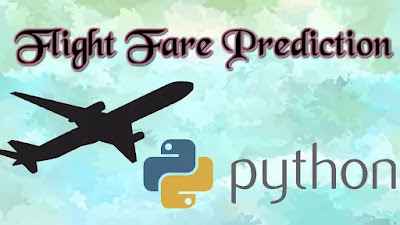


# Problem Statement
Create a model which will predict the price of the flight as well as perform analysis and draw 

# Dependencies
- Pandas
- Numpy
- Matlpotlib
- Scikit-Learn
- Tensorflow
- RegEx


# Data Description
Two different data sources provides data for flights with economy and business class seats.

# Data Dictionary

- date : Date of flight originiating in IST(GMT +5:30)
- airline : Name of airline operator
- ch_code : Code given by airline operator by IATA
- num_code: Unique flight identification code provided by IATA
- dep_time: Departure time of flight in 24 hr format in HH:MM ex: 18:20
- from: Location of origin of flight
- time_taken: Time taken by flight to reach destination in format such as 24 hr 50 min
- stop: It is a categorical variable defining no of stoppage of a flight such as non-stop,1-stop,2+ stop
- to: Location of origin of flight
- arr_time: Arrival time of flight in 24 hr format in HH:MM ex: 23:19
- price: It is total amount charged for boarding in a flight for each seat.


# Importing Libraries

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import logging

# Custom Function (Helper functions)

In [166]:
def convert_log_toactual(input_pred):
  '''reverse log transformed value to actual value'''
  y_actual = np.exp(input_pred-1)
  return y_actual

In [167]:
def scores(y_test,y_pred_lr):
  '''calculate evaluation metrics scores'''

  MSE= mean_squared_error((y_test), (y_pred_lr))
  RMSE= np.sqrt(MSE)
  r2_score_ = r2_score((y_test),(y_pred_lr))
  aj_r2_score = 1-(1-r2_score((y_test), (y_pred_lr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  return MSE,RMSE,r2_score_,aj_r2_score

In [245]:
def export_to_csv(path_loc,file_name,data):
  '''export data frame file to path loc'''
  
  df.to_csv(path_loc + file_name)

  logging.warning('file exported to designated location' )


In [168]:
def time_taken_to_hour(t):
  '''convert time in format like 23hr 15 min to 23.25 hr'''
   
  hr,min = t.split(" ")
  hr = hr[:-1]
  min = min[:-1]
  tt=0
  if hr:
    tt = float(hr) + tt
  else:
    pass
  if min:
    tt = float(min)/60 + tt
  else:
    tt = tt + 0



  return round(tt,2)

In [248]:
# Import library for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  '''calculate VIF'''
  
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [70]:
# Define a function to remove outliers from a numerical column using the interquartile range (IQR) method
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[df[column] < (Q3 + 1.5*IQR)]
    return df

In [71]:
def calculate_iqr(col):
  
  '''to calculate up_limit and lower limit of IQR'''
  
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  up_limit = 1.5 * iqr + q3
  low_limit = q1 - 1.5 * iqr

  return up_limit,low_limit,q1,q3

# Data Wrangling

In [170]:
business_class = pd.read_csv("/content/drive/MyDrive/Internship and job assignment/ShelfPerks/ShelfPerks_Takehome_ML_MayJune2023_business.csv")
economy_class = pd.read_csv("/content/drive/MyDrive/Internship and job assignment/ShelfPerks/ShelfPerks_Takehome_ML_MayJune2023_economy.csv")

In [171]:
# top 5 rows in business_class df

business_class.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [172]:
# bottom 5 rows in business_class df

business_class.tail()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585"
93486,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"81,585"


In [173]:
# top 5 rows in economy_class df

economy_class.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [174]:
# bottom 5 rows in economy_class df

economy_class.tail()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206773,31-03-2022,Vistara,UK,824,20:30,Chennai,24h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"8,640"


In [175]:
# no. of rows in both df

print(f" Total rows in business class is = {len(business_class)} rows")
print(f" Total rows in economy class is  = {len(economy_class)} rows ")

 Total rows in business class is = 93487 rows
 Total rows in economy class is  = 206774 rows 


In [176]:
# duplicated rows
business_class.duplicated().sum()

0

In [177]:
# duplicated rows economy class
economy_class.duplicated().sum()

2

In [178]:
# removing duplicated rows
economy_class = economy_class[~economy_class.duplicated()]

In [179]:
business_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [180]:
# change data type
business_class['date'] = pd.to_datetime(business_class['date'], format="%d-%m-%Y")
economy_class['date'] = pd.to_datetime(economy_class['date'], format="%d-%m-%Y")

In [181]:
business_class['price'] = business_class['price'].str.replace(',', '').astype(float)

economy_class['price'] = economy_class['price'].str.replace(',', '').astype(float)

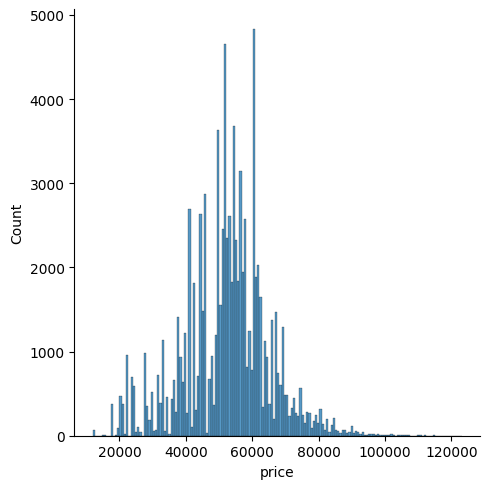

In [182]:
#distribution of price in business class

sns.displot(business_class['price'])
plt.show()

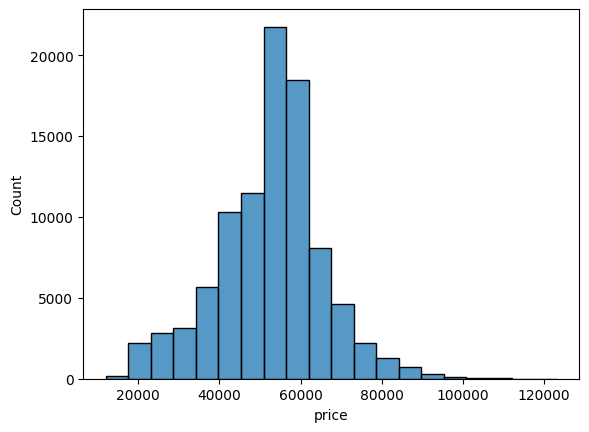

In [183]:
#distribution of price in business class

sns.histplot(business_class['price'],bins=20)
plt.show()

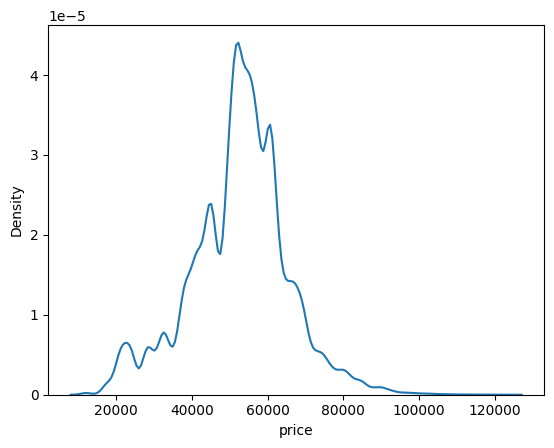

In [184]:
#distribution of price in business class

sns.kdeplot(business_class['price'])
plt.show()

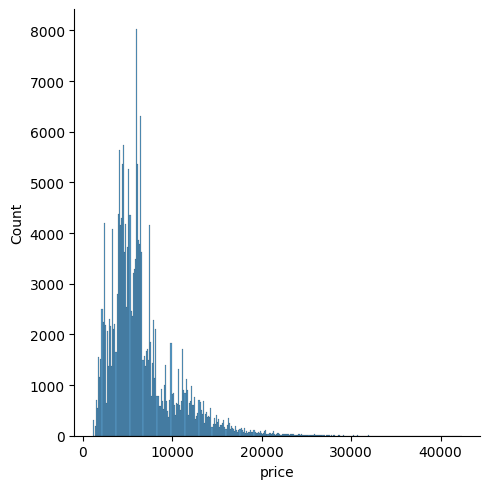

In [185]:
#distribution of price in business class

sns.displot(economy_class['price'])

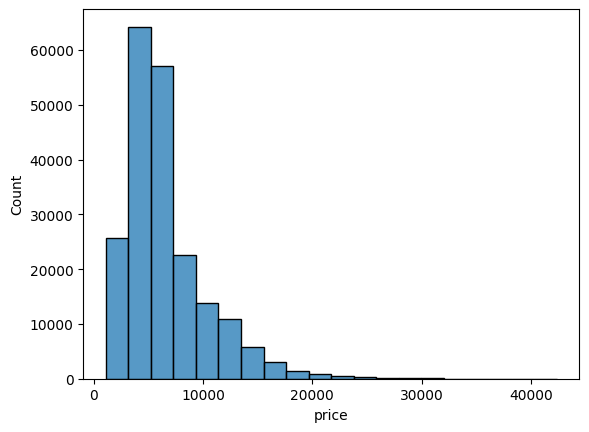

In [186]:
#distribution of price in business class

sns.histplot(economy_class['price'],bins=20)
plt.show()

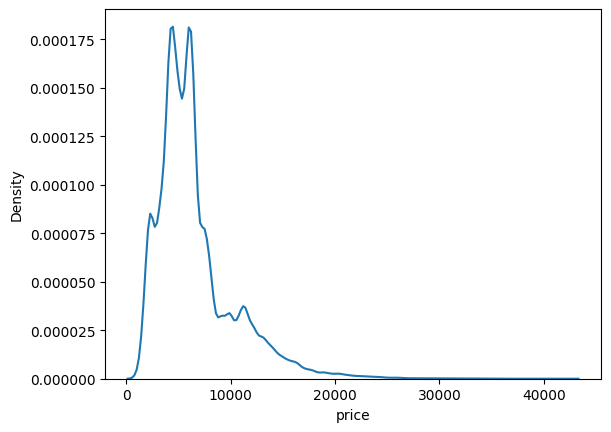

In [187]:
#distribution of price in economy class

sns.kdeplot(economy_class['price'])
plt.show()

In [188]:
business_class['category'] = "business"

In [189]:
economy_class['category']= "economy"

# Merging both df

In [190]:
df = business_class.merge(economy_class,how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300259 entries, 0 to 300258
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        300259 non-null  datetime64[ns]
 1   airline     300259 non-null  object        
 2   ch_code     300259 non-null  object        
 3   num_code    300259 non-null  int64         
 4   dep_time    300259 non-null  object        
 5   from        300259 non-null  object        
 6   time_taken  300259 non-null  object        
 7   stop        300259 non-null  object        
 8   arr_time    300259 non-null  object        
 9   to          300259 non-null  object        
 10  price       300259 non-null  float64       
 11  category    300259 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 29.8+ MB


In [191]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
category      0
dtype: int64

In [192]:
def clean_text(text):
  text = text.lower()
  text = re.sub('\n',"",text)
  text = re.sub('\t',"",text)
  text = re.sub('-',"",text)
  text = re.sub(' ',"",text)

  return text


In [193]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,category
0,2022-02-11,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612.0,business
1,2022-02-11,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612.0,business
2,2022-02-11,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,42220.0,business
3,2022-02-11,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,44450.0,business
4,2022-02-11,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,46690.0,business


In [194]:
col_to_clean = ['airline','from','to','stop']

for col in col_to_clean:
  df[col] = df[col].apply(lambda x: clean_text(x))

In [195]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,category
0,2022-02-11,airindia,AI,868,18:00,delhi,02h 00m,nonstop,20:00,mumbai,25612.0,business
1,2022-02-11,airindia,AI,624,19:00,delhi,02h 15m,nonstop,21:15,mumbai,25612.0,business
2,2022-02-11,airindia,AI,531,20:00,delhi,24h 45m,1stop,20:45,mumbai,42220.0,business
3,2022-02-11,airindia,AI,839,21:25,delhi,26h 30m,1stop,23:55,mumbai,44450.0,business
4,2022-02-11,airindia,AI,544,17:15,delhi,06h 40m,1stop,23:55,mumbai,46690.0,business


# EDA

Variety of airline operators and thier counts

- Vistara has highest no of flights
- Air India has second highest no of flights
- Indigo is third


Acc. to data
- only vistara and air india has flights with business class
- In case of business class vistara has highest no of flights followed by air india

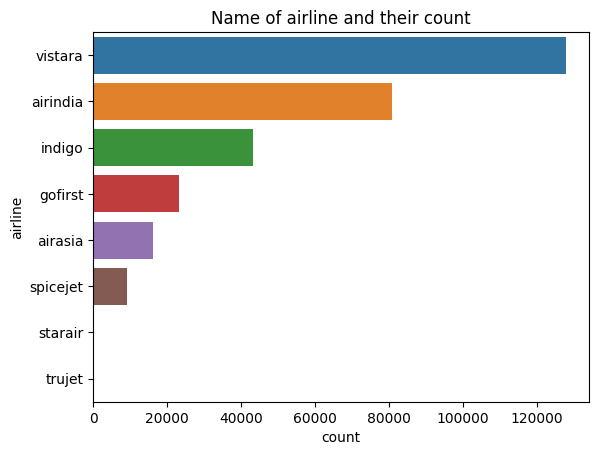

In [196]:
# variety of airline operators and their counts

airline_count = df.groupby('airline').size().reset_index(name='count').sort_values(by='count',ascending=False)

#sns.barplot(data = airline_count,x='')
sns.barplot(data = airline_count,y='airline',x='count')
plt.title("Name of airline and their count")
plt.show()

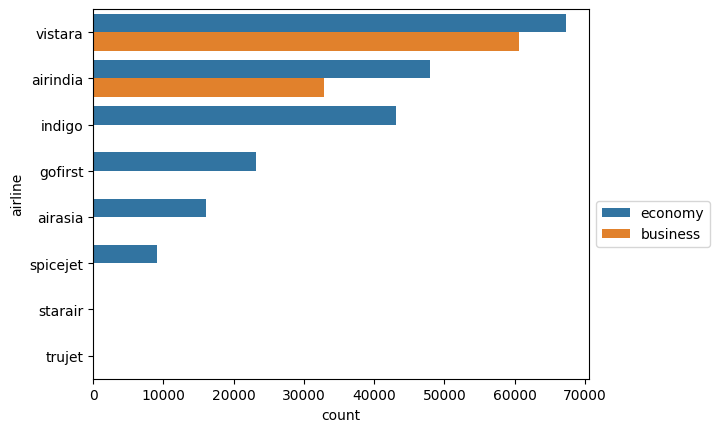

In [197]:
# variety of airline operators and their counts

xy = df.groupby(['airline','category']).size().reset_index(name='count').sort_values(by='count',ascending=False)

sns.barplot(data = xy,y='airline',x='count',hue='category')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()


ch_code feature exploration

As ch_code is code given by IATA to each flight operator so it is better during model building using either ch_code or airline (airline name) feature

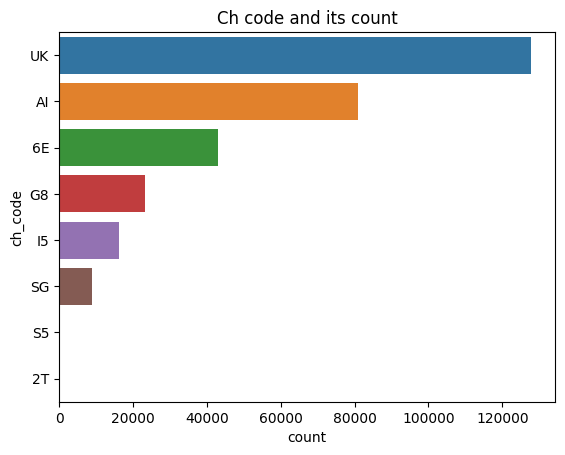

In [198]:
# type of ch_code and their count

chcode_count = df.groupby('ch_code').size().reset_index(name='count').sort_values(by='count',ascending=False)

#sns.barplot(data = airline_count,x='')
sns.barplot(data = chcode_count,y='ch_code',x='count')
plt.title("Ch code and its count")
plt.show()

num_code feature exploration

num_code is categorical in nature and it is a three digit code given to airline and there are more than 1255 num_code, so it can be better to not use this feature for model

In [199]:
# no of num_code present in df

len(df.num_code.unique())

1255

In [200]:
df.groupby(['airline','num_code']).size().reset_index(name='count').sort_values(by='count',ascending=False)[:20]

,airline,num_code,count
1450,vistara,706,3235
1462,vistara,772,2741
1453,vistara,720,2650
1498,vistara,836,2542
1485,vistara,822,2468
1491,vistara,828,2440
1526,vistara,874,2423
1494,vistara,832,2404
1489,vistara,826,2335
1516,vistara,860,2329


Departure time

In [201]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price', 'category'],
      dtype='object')

<Axes: xlabel='count', ylabel='dep_time'>

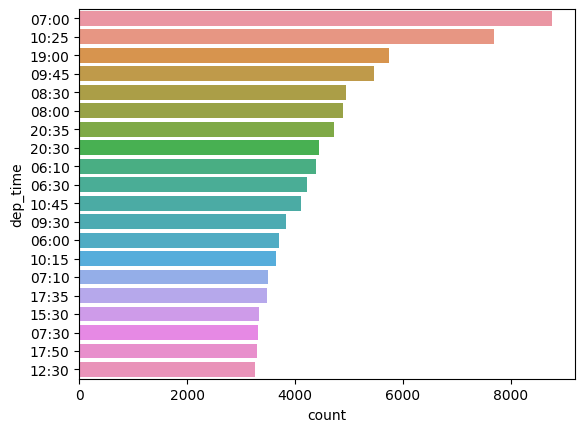

In [202]:
#Top 20 departure time in over all data

top_depttime = df.groupby(['dep_time']).size().reset_index(name='count').sort_values(by='count',ascending=False)[:20]
sns.barplot(data = top_depttime,y = 'dep_time',x='count')

Time taken

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300259 entries, 0 to 300258
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        300259 non-null  datetime64[ns]
 1   airline     300259 non-null  object        
 2   ch_code     300259 non-null  object        
 3   num_code    300259 non-null  int64         
 4   dep_time    300259 non-null  object        
 5   from        300259 non-null  object        
 6   time_taken  300259 non-null  object        
 7   stop        300259 non-null  object        
 8   arr_time    300259 non-null  object        
 9   to          300259 non-null  object        
 10  price       300259 non-null  float64       
 11  category    300259 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 29.8+ MB


In [204]:
df['time_taken']=df['time_taken'].apply(lambda x: time_taken_to_hour(x))

Longest domestic flight time: 3hr 25 min

link : [link](https://www.moneycontrol.com/news/business/the-longest-and-shortest-routes-in-indian-skies-this-winter-9429351.html#:~:text=The%20longest%20routes&text=The%202%2C279%20km%20of%20distance,the%20longest%20for%20the%20airline.)

Degree of skewness =  -0.5408263586718002


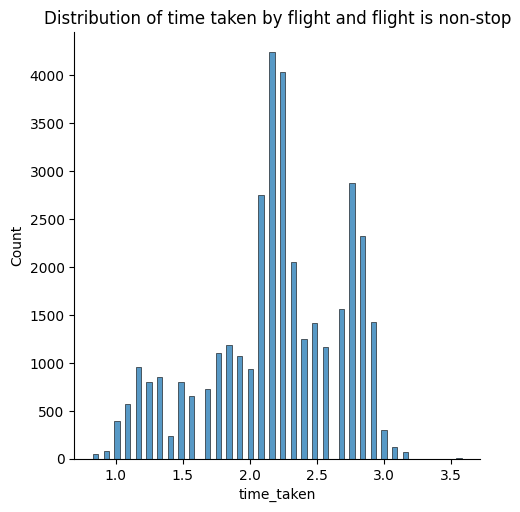

In [205]:
#distribution of time taken by flight and flight is non-stop
print("Degree of skewness = ",df['time_taken'][df['stop']=='nonstop'].skew(),end="\n")
sns.displot(df['time_taken'][df['stop']=='nonstop'])
plt.title("Distribution of time taken by flight and flight is non-stop")
plt.show()

Degree of skewness =  0.753893017504641


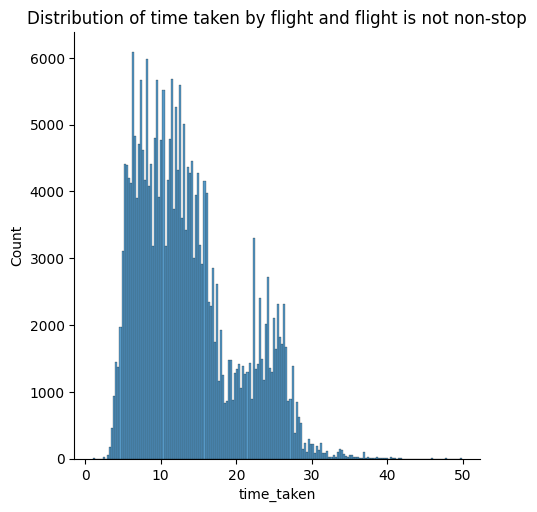

In [206]:
#distribution of time taken by flight and flight is not non-stop
print("Degree of skewness = ",df['time_taken'][~(df['stop']=='nonstop')].skew(),end="\n")
sns.displot(df['time_taken'][~(df['stop']=='nonstop')])
plt.title("Distribution of time taken by flight and flight is not non-stop")
plt.show()

Degree of skewness =  0.753893017504641


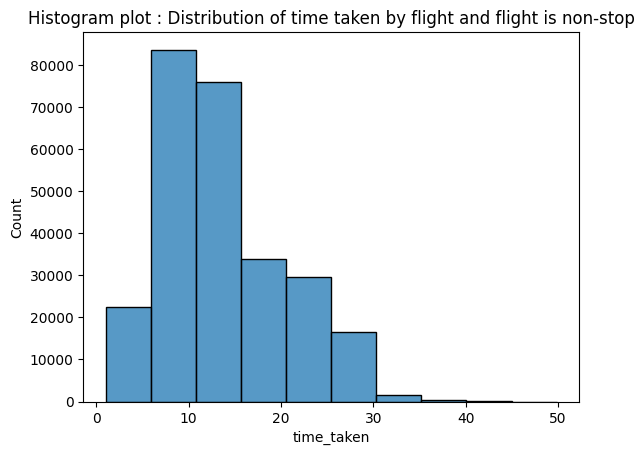

In [207]:
#distribution of time taken by flight and flight is not non-stop
print("Degree of skewness = ",df['time_taken'][~(df['stop']=='nonstop')].skew(),end="\n")
sns.histplot(df['time_taken'][~(df['stop']=='nonstop')],bins=10)
plt.title("Histogram plot : Distribution of time taken by flight and flight is non-stop")
plt.show()
plt.show()

Origin point

In [208]:
# flight originating from a location and its count

origin_df = df.groupby('from').size().reset_index(name='count').sort_values(by='count',ascending=False)
origin_df

,from,count
2,delhi,61343
5,mumbai,60903
0,bangalore,52106
4,kolkata,46347
3,hyderabad,40860
1,chennai,38700


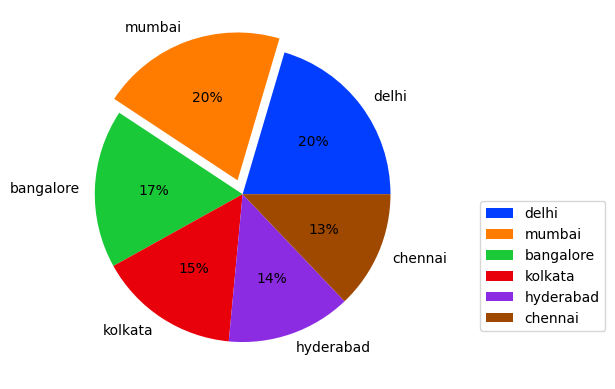

In [209]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# declaring exploding pie
explode = [0, 0.1, 0, 0, 0,0]

# plotting data on chart
plt.pie(origin_df['count'],labels=origin_df['from'],colors=palette_color, autopct='%00.0f%%', explode=explode)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.5))
  
# displaying chart
plt.show()

Destination points

In [210]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,category
0,2022-02-11,airindia,AI,868,18:00,delhi,2.00,nonstop,20:00,mumbai,25612.0,business
1,2022-02-11,airindia,AI,624,19:00,delhi,2.25,nonstop,21:15,mumbai,25612.0,business
2,2022-02-11,airindia,AI,531,20:00,delhi,24.75,1stop,20:45,mumbai,42220.0,business
3,2022-02-11,airindia,AI,839,21:25,delhi,26.50,1stop,23:55,mumbai,44450.0,business
4,2022-02-11,airindia,AI,544,17:15,delhi,6.67,1stop,23:55,mumbai,46690.0,business


In [211]:
# flight reaching to a location and its count

destination_df = df.groupby('to').size().reset_index(name='count').sort_values(by='count',ascending=False)
destination_df

,to,count
5,mumbai,59107
2,delhi,57361
0,bangalore,51112
4,kolkata,49535
3,hyderabad,42776
1,chennai,40368


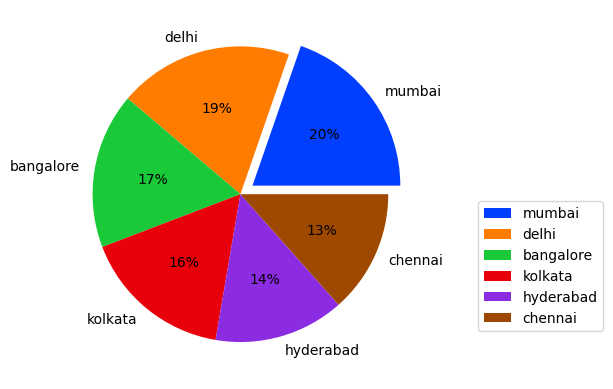

In [212]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# declaring exploding pie
explode = [0.1, 0, 0, 0, 0,0]

# plotting data on chart
plt.pie(destination_df['count'],labels=destination_df['to'],colors=palette_color, autopct='%00.0f%%', explode=explode)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.5))
  
# displaying chart
plt.show()

Category of flight : Business vs Domestic

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300259 entries, 0 to 300258
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        300259 non-null  datetime64[ns]
 1   airline     300259 non-null  object        
 2   ch_code     300259 non-null  object        
 3   num_code    300259 non-null  int64         
 4   dep_time    300259 non-null  object        
 5   from        300259 non-null  object        
 6   time_taken  300259 non-null  float64       
 7   stop        300259 non-null  object        
 8   arr_time    300259 non-null  object        
 9   to          300259 non-null  object        
 10  price       300259 non-null  float64       
 11  category    300259 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 29.8+ MB


In [214]:
category_df = df.groupby('category').size().reset_index(name='count').sort_values(by='count',ascending=False)
category_df

,category,count
1,economy,206772
0,business,93487


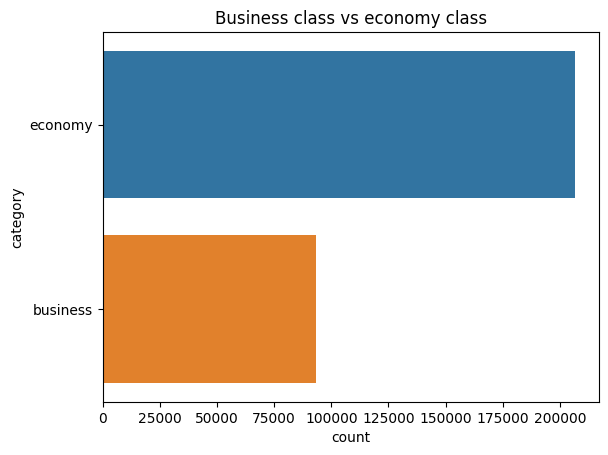

In [215]:
#business class vs economy class in flights

sns.barplot(data = category_df,y='category',x='count')
plt.title("Business class vs economy class")
plt.show()

Price : Our target variable 

- After merging data set two maxima in distribution
  - For regression problem it is expected that error in target variable must be normally distributed
  - Price for economy class is positively skewed
  - Price for business class is very less skewed

There is need for some transformation like Log Transformation, Box-Cox Transformation or Yeo- Johansan Transformantion

Degree of skewness =  1.0618818903392426


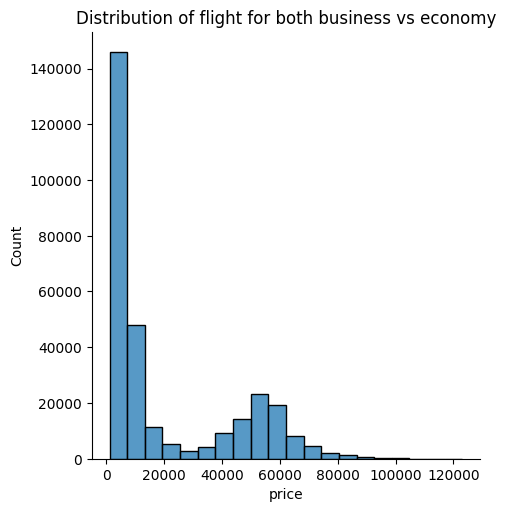

In [216]:
# complete distribution of flight for both business vs economy
print("Degree of skewness = ",df['price'].skew(),end="\n")
sns.displot(df['price'],bins=20)
plt.title("Distribution of flight for both business vs economy")
plt.show()

Degree of skewness =  -0.09523708580664521


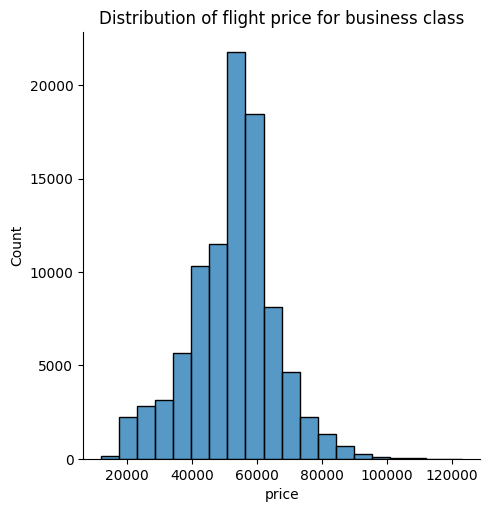

In [217]:
# complete distribution of flight for business class

print("Degree of skewness = ",df['price'][df['category']=='business'].skew(),end="\n")
sns.displot(df['price'][df['category']=='business'],bins=20)
plt.title("Distribution of flight price for business class")
plt.show()

Degree of skewness =  1.7032487560750689


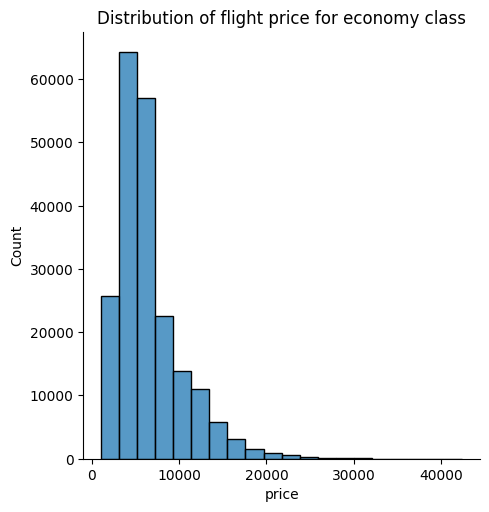

In [218]:
# complete distribution of flight for economy class

print("Degree of skewness = ",df['price'][df['category']=='economy'].skew(),end="\n")
sns.displot(df['price'][df['category']=='economy'],bins=20)
plt.title("Distribution of flight price for economy class")
plt.show()

Log transformation

Experimenting with

Degree of skewness =  0.40469869808173214


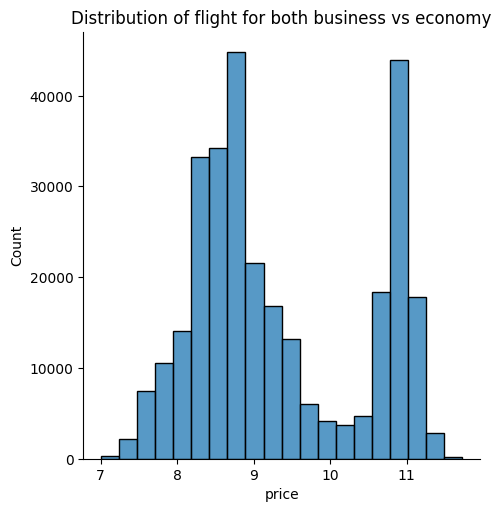

In [219]:
print("Degree of skewness = ",np.log(df['price']).skew(),end="\n")
sns.displot(np.log(df['price']),bins=20)
plt.title("Distribution of flight for both business vs economy")
plt.show()

Stoppage

In [220]:
#rectifying stoppage column

df.loc[~df['stop'].isin(['1stop', 'nonstop', '2+stop']), 'stop'] = '1stop'

In [221]:
df['stop'].value_counts()

1stop      250927
nonstop     36044
2+stop      13288
Name: stop, dtype: int64

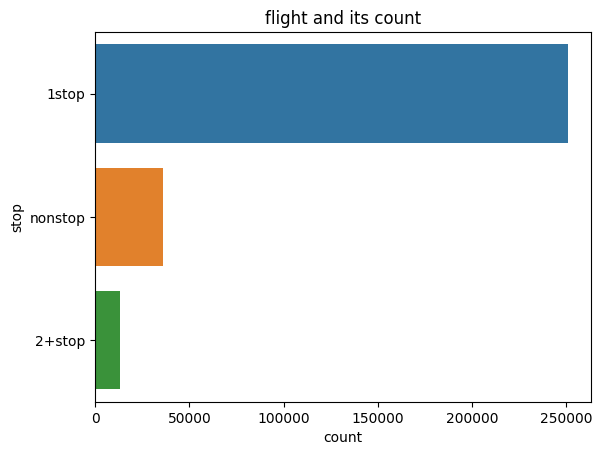

In [222]:
# type of ch_code and their count

flight_stop_count = df.groupby('stop').size().reset_index(name='count').sort_values(by='count',ascending=False)

#sns.barplot(data = airline_count,x='')
sns.barplot(data = flight_stop_count,y='stop',x='count')
plt.title("flight and its count")
plt.show()

# Mutivariate analysis

Date vs price

We have data of 48 days

In [223]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,category
0,2022-02-11,airindia,AI,868,18:00,delhi,2.00,nonstop,20:00,mumbai,25612.0,business
1,2022-02-11,airindia,AI,624,19:00,delhi,2.25,nonstop,21:15,mumbai,25612.0,business
2,2022-02-11,airindia,AI,531,20:00,delhi,24.75,1stop,20:45,mumbai,42220.0,business
3,2022-02-11,airindia,AI,839,21:25,delhi,26.50,1stop,23:55,mumbai,44450.0,business
4,2022-02-11,airindia,AI,544,17:15,delhi,6.67,1stop,23:55,mumbai,46690.0,business


In [224]:
df['date'].max()-df['date'].min()

Timedelta('48 days 00:00:00')

In [225]:
print(f"Max date in data: {df['date'].max()}")
print(f"Min date in data: {df['date'].min()}")
print(f"total time diff in data : {df['date'].max()-df['date'].min()}")

Max date in data: 2022-03-31 00:00:00
Min date in data: 2022-02-11 00:00:00
total time diff in data : 48 days 00:00:00


In [226]:
price_df = df.groupby(['date', 'category']).agg({'price': ['mean', 'max', 'min', 'median']})

price_df.columns = ['mean_price', 'max_price', 'min_price', 'median_price']

# Reset the index
price_df = price_df.reset_index()
price_df

,date,category,mean_price,max_price,min_price,median_price
0,2022-02-11,business,65169.312030,116562.0,19228.0,65445.0
1,2022-02-11,economy,14613.179410,42349.0,4452.0,14150.0
2,2022-02-12,business,60455.848506,114523.0,15360.0,59356.0
3,2022-02-12,economy,13964.980571,35145.0,1977.0,13212.0
4,2022-02-13,business,60313.822331,123071.0,15360.0,58525.0
...,...,...,...,...,...,...
93,2022-03-29,economy,4669.346567,15059.0,1105.0,4497.0
94,2022-03-30,business,51558.758230,93200.0,15000.0,53152.0
95,2022-03-30,economy,4717.688994,16168.0,1105.0,4496.0
96,2022-03-31,business,51124.505820,92027.0,12000.0,52392.0


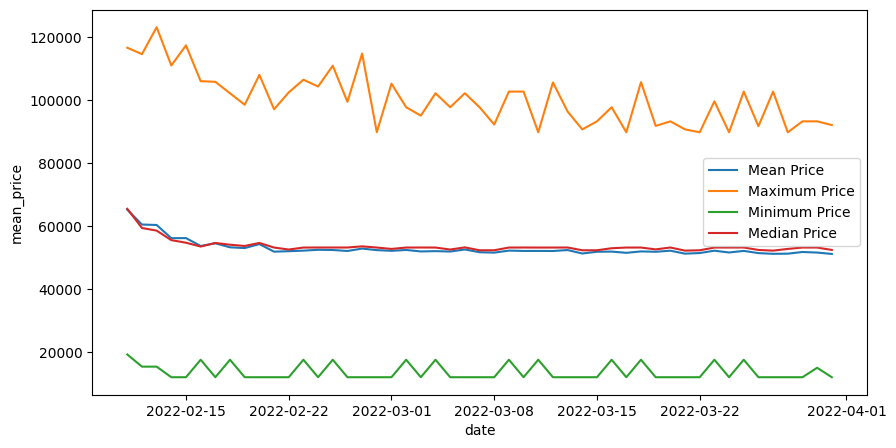

In [227]:
# business class price agg vs date
plt.figure(figsize=(10, 5))
price_busi = price_df[price_df['category']=='business']

sns.lineplot(data=price_busi, x='date', y='mean_price', label='Mean Price')
sns.lineplot(data=price_busi, x='date', y='max_price', label='Maximum Price')
sns.lineplot(data=price_busi, x='date', y='min_price', label='Minimum Price')
sns.lineplot(data=price_busi, x='date', y='median_price', label='Median Price')

plt.legend()
plt.show()

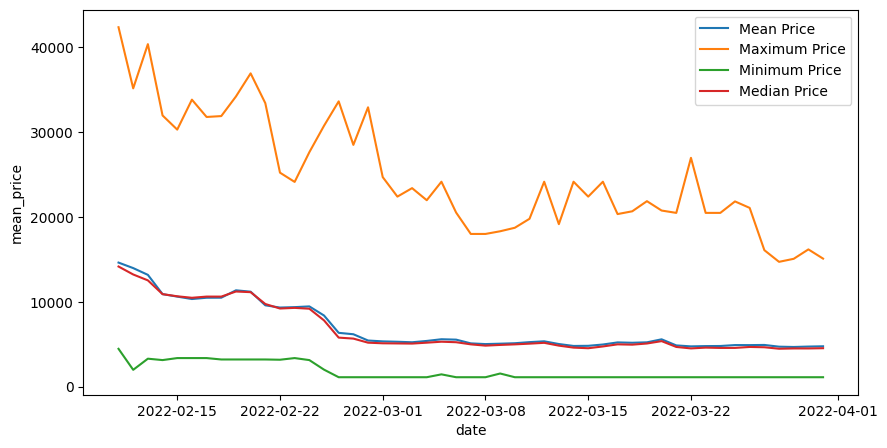

In [228]:
# business class price agg vs date
plt.figure(figsize=(10, 5))
price_economy = price_df[price_df['category']=='economy']

sns.lineplot(data=price_economy, x='date', y='mean_price', label='Mean Price')
sns.lineplot(data=price_economy , x='date', y='max_price', label='Maximum Price')
sns.lineplot(data=price_economy , x='date', y='min_price', label='Minimum Price')
sns.lineplot(data=price_economy , x='date', y='median_price', label='Median Price')

plt.legend()
plt.show()

price for nonstop flight

In [229]:
price_nonstop = df[df['stop']=='nonstop']
price_nonstop

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,category
0,2022-02-11,airindia,AI,868,18:00,delhi,2.00,nonstop,20:00,mumbai,25612.0,business
1,2022-02-11,airindia,AI,624,19:00,delhi,2.25,nonstop,21:15,mumbai,25612.0,business
5,2022-02-11,vistara,UK,985,19:50,delhi,2.17,nonstop,22:00,mumbai,50264.0,business
9,2022-02-11,vistara,UK,977,19:00,delhi,2.25,nonstop,21:15,mumbai,53288.0,business
34,2022-02-12,vistara,UK,953,20:40,delhi,2.17,nonstop,22:50,mumbai,25736.0,business
...,...,...,...,...,...,...,...,...,...,...,...,...
300205,2022-03-31,indigo,6E,156,21:15,chennai,1.25,nonstop,22:30,hyderabad,1551.0,economy
300206,2022-03-31,indigo,6E,562,17:00,chennai,1.33,nonstop,18:20,hyderabad,1551.0,economy
300207,2022-03-31,indigo,6E,6215,18:10,chennai,1.33,nonstop,19:30,hyderabad,1551.0,economy
300208,2022-03-31,indigo,6E,193,19:40,chennai,1.33,nonstop,21:00,hyderabad,1551.0,economy


In [230]:
price_nonstop = price_nonstop.groupby(['date', 'category']).agg({'price': ['mean', 'max', 'min', 'median']})

price_nonstop.columns = ['mean_price', 'max_price', 'min_price', 'median_price']

# Reset the index
price_nonstop = price_nonstop.reset_index()
price_nonstop

,date,category,mean_price,max_price,min_price,median_price
0,2022-02-11,business,35068.103448,59509.0,19228.0,32556.0
1,2022-02-11,economy,9011.942029,20874.0,4452.0,7895.5
2,2022-02-12,business,31711.407692,56878.0,15360.0,31269.5
3,2022-02-12,economy,8093.041436,18198.0,3361.0,7418.5
4,2022-02-13,business,32498.184000,59509.0,15360.0,31721.0
...,...,...,...,...,...,...
93,2022-03-29,economy,2950.753695,11278.0,1105.0,2700.0
94,2022-03-30,business,27301.251534,56878.0,15000.0,27864.0
95,2022-03-30,economy,3005.026446,10479.0,1105.0,2750.0
96,2022-03-31,business,27054.157576,44664.0,12000.0,27864.0


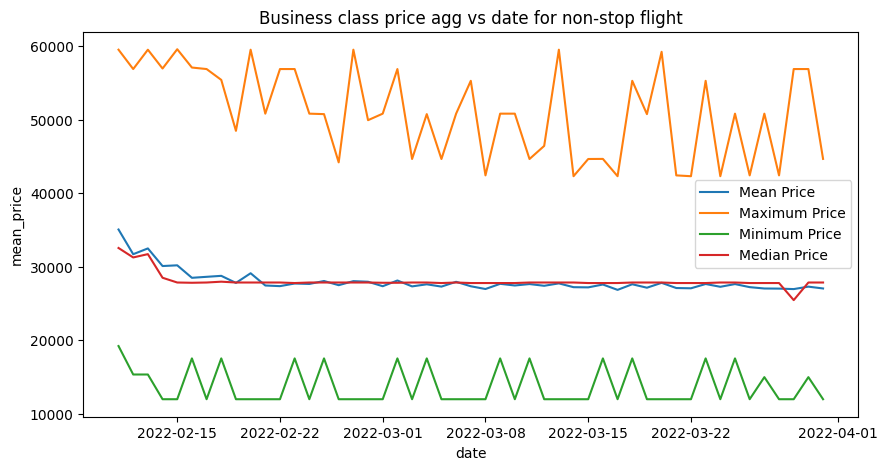

In [231]:
# Business class price agg vs date for nonstop flight
plt.figure(figsize=(10, 5))
price_nonstop_busi = price_nonstop[price_nonstop['category']=='business']

sns.lineplot(data=price_nonstop_busi, x='date', y='mean_price', label='Mean Price')
sns.lineplot(data=price_nonstop_busi, x='date', y='max_price', label='Maximum Price')
sns.lineplot(data=price_nonstop_busi, x='date', y='min_price', label='Minimum Price')
sns.lineplot(data=price_nonstop_busi, x='date', y='median_price', label='Median Price')
plt.title("Business class price agg vs date for non-stop flight")
plt.legend()
plt.show()

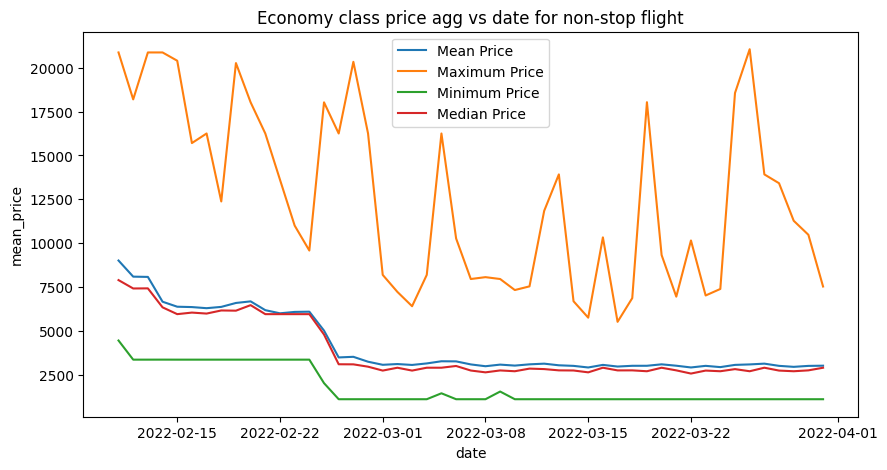

In [232]:
# economy class price agg vs date for nonstop flight
plt.figure(figsize=(10, 5))
price_nonstop_eco = price_nonstop[price_nonstop['category']=='economy']

sns.lineplot(data=price_nonstop_eco, x='date', y='mean_price', label='Mean Price')
sns.lineplot(data=price_nonstop_eco, x='date', y='max_price', label='Maximum Price')
sns.lineplot(data=price_nonstop_eco, x='date', y='min_price', label='Minimum Price')
sns.lineplot(data=price_nonstop_eco, x='date', y='median_price', label='Median Price')
plt.title("Economy class price agg vs date for non-stop flight")
plt.legend()
plt.show()

In [233]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,category
0,2022-02-11,airindia,AI,868,18:00,delhi,2.00,nonstop,20:00,mumbai,25612.0,business
1,2022-02-11,airindia,AI,624,19:00,delhi,2.25,nonstop,21:15,mumbai,25612.0,business
2,2022-02-11,airindia,AI,531,20:00,delhi,24.75,1stop,20:45,mumbai,42220.0,business
3,2022-02-11,airindia,AI,839,21:25,delhi,26.50,1stop,23:55,mumbai,44450.0,business
4,2022-02-11,airindia,AI,544,17:15,delhi,6.67,1stop,23:55,mumbai,46690.0,business


# Exporting cleaned merged file

In [246]:
#export path
export_path='/content/drive/MyDrive/Internship and job assignment/ShelfPerks/'

#exporting to csv
export_to_csv(export_path,'mergeddata',df)

In [249]:
df.drop(columns=['ch_code','num_code'],inplace=True)

# Outlier removal

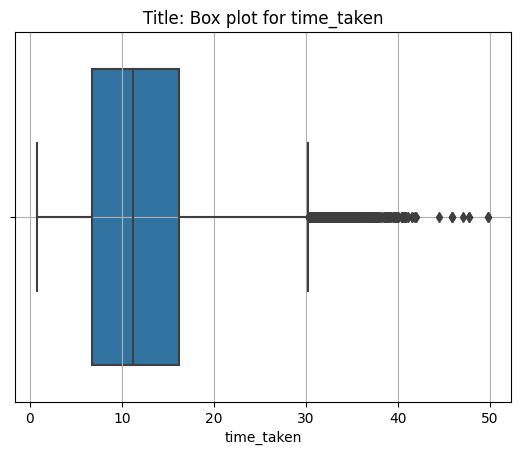

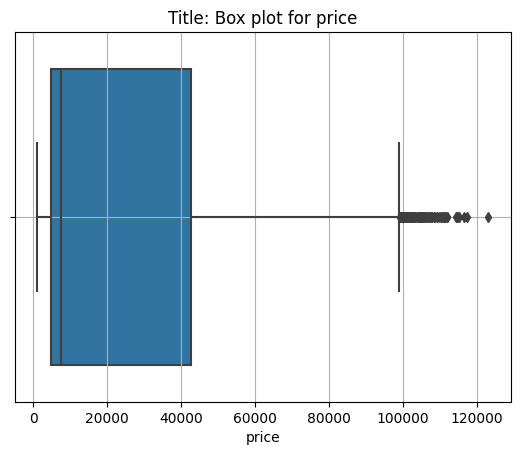

In [72]:
# plotting box plot to check outliers

for col in df.describe().columns:
  sns.boxplot(x=df[col])
  plt.title(f"Title: Box plot for {col}")
  plt.grid()
  plt.show()
  print('\n')

In [73]:
up_limit_price,low_limit_price,q1,q3 = calculate_iqr('price')

up_limit_price,low_limit_price,q1,q3

(99128.0, -51824.0, 4783.0, 42521.0)

In [74]:
#percentage of price rows with outliers

len(df[df['price']>99128.0])/len(df)*100

0.040964633866095605

In [75]:
df=df[df['price']<=up_limit_price]

In [76]:
up_limit_tt,low_limit_tt,q1,q3 = calculate_iqr('time_taken')

up_limit_tt,low_limit_tt,q1,q3

(30.300000000000004, -7.380000000000003, 6.75, 16.17)

In [77]:
#percentage of time_taken rows with outliers

len(df[df['time_taken']>30.30])/len(df)*100

0.6676973105525494

In [78]:
df=df[df['time_taken']<=up_limit_tt]

# Feature engineering

In [79]:
df1 = df.copy()

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298132 entries, 0 to 300258
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        298132 non-null  datetime64[ns]
 1   airline     298132 non-null  object        
 2   dep_time    298132 non-null  object        
 3   from        298132 non-null  object        
 4   time_taken  298132 non-null  float64       
 5   stop        298132 non-null  object        
 6   arr_time    298132 non-null  object        
 7   to          298132 non-null  object        
 8   price       298132 non-null  float64       
 9   category    298132 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 25.0+ MB


In [81]:
df1.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,category
0,2022-02-11,airindia,18:00,delhi,2.00,nonstop,20:00,mumbai,25612.0,business
1,2022-02-11,airindia,19:00,delhi,2.25,nonstop,21:15,mumbai,25612.0,business
2,2022-02-11,airindia,20:00,delhi,24.75,1stop,20:45,mumbai,42220.0,business
3,2022-02-11,airindia,21:25,delhi,26.50,1stop,23:55,mumbai,44450.0,business
4,2022-02-11,airindia,17:15,delhi,6.67,1stop,23:55,mumbai,46690.0,business


In [82]:
df1['dep_hr'],df1['dep_min']=df1['dep_time'].str.split(":").str
df1['arr_hr'],df1['arr_min']=df1['arr_time'].str.split(":").str

df1['dep_hr'] = df1['dep_hr'].astype(int)
df1['dep_min'] = df1['dep_min'].astype(int)


df1['arr_hr'] = df1['arr_hr'].astype(int)
df1['arr_min'] = df1['arr_min'].astype(int)

df1['day']=df['date'].dt.day
df1['month']=df['date'].dt.month
df1['year']=df['date'].dt.year



<ipython-input-82-3c907f612a17>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df1['dep_hr'],df1['dep_min']=df1['dep_time'].str.split(":").str
<ipython-input-82-3c907f612a17>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df1['arr_hr'],df1['arr_min']=df1['arr_time'].str.split(":").str


In [83]:
df1

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,category,dep_hr,dep_min,arr_hr,arr_min,day,month,year
0,2022-02-11,airindia,18:00,delhi,2.00,nonstop,20:00,mumbai,25612.0,business,18,0,20,0,11,2,2022
1,2022-02-11,airindia,19:00,delhi,2.25,nonstop,21:15,mumbai,25612.0,business,19,0,21,15,11,2,2022
2,2022-02-11,airindia,20:00,delhi,24.75,1stop,20:45,mumbai,42220.0,business,20,0,20,45,11,2,2022
3,2022-02-11,airindia,21:25,delhi,26.50,1stop,23:55,mumbai,44450.0,business,21,25,23,55,11,2,2022
4,2022-02-11,airindia,17:15,delhi,6.67,1stop,23:55,mumbai,46690.0,business,17,15,23,55,11,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300254,2022-03-31,vistara,07:05,chennai,13.83,1stop,20:55,hyderabad,7697.0,economy,7,5,20,55,31,3,2022
300255,2022-03-31,vistara,07:05,chennai,13.83,1stop,20:55,hyderabad,7709.0,economy,7,5,20,55,31,3,2022
300256,2022-03-31,vistara,12:30,chennai,20.58,1stop,09:05,hyderabad,8640.0,economy,12,30,9,5,31,3,2022
300257,2022-03-31,vistara,09:45,chennai,23.33,1stop,09:05,hyderabad,8640.0,economy,9,45,9,5,31,3,2022


# Correlation analysis

In [84]:
df1.corr(numeric_only=True)

,time_taken,price,dep_hr,dep_min,arr_hr,arr_min,day,month,year
time_taken,1.000000,0.215900,0.158287,0.007732,-0.034975,0.051705,-0.002497,-0.033132,NaN
price,0.215900,1.000000,0.030634,0.027723,0.074963,0.044750,-0.002786,-0.091360,NaN
dep_hr,0.158287,0.030634,1.000000,0.061049,-0.158096,0.050563,-0.002046,-0.004248,NaN
dep_min,0.007732,0.027723,0.061049,1.000000,0.000674,0.046179,-0.005979,-0.005789,NaN
arr_hr,-0.034975,0.074963,-0.158096,0.000674,1.000000,-0.021880,-0.005226,-0.018785,NaN
arr_min,0.051705,0.044750,0.050563,0.046179,-0.021880,1.000000,-0.002219,-0.005682,NaN
day,-0.002497,-0.002786,-0.002046,-0.005979,-0.005226,-0.002219,1.000000,-0.262547,NaN
month,-0.033132,-0.091360,-0.004248,-0.005789,-0.018785,-0.005682,-0.262547,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


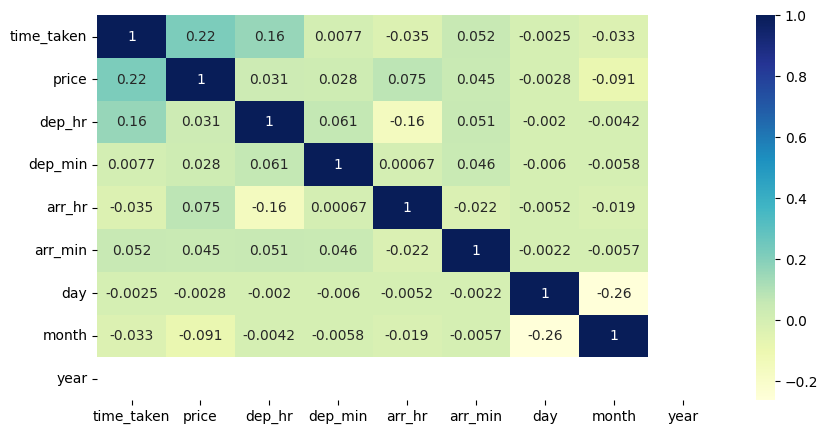

In [85]:
plt.figure(figsize=(10, 5))
sns.heatmap(df1.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

In [87]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['price']]])

,variables,VIF
0,time_taken,1.029068
1,dep_hr,1.056309
2,dep_min,1.005840
3,arr_hr,1.026601
4,arr_min,1.006654
5,day,1.074389
6,month,1.075969
7,year,69.382660


In [88]:
df1.drop(columns='year',inplace=True)

In [89]:
df1.drop(columns='month',inplace=True)

In [90]:
df1.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,category,dep_hr,dep_min,arr_hr,arr_min,day
0,2022-02-11,airindia,18:00,delhi,2.00,nonstop,20:00,mumbai,25612.0,business,18,0,20,0,11
1,2022-02-11,airindia,19:00,delhi,2.25,nonstop,21:15,mumbai,25612.0,business,19,0,21,15,11
2,2022-02-11,airindia,20:00,delhi,24.75,1stop,20:45,mumbai,42220.0,business,20,0,20,45,11
3,2022-02-11,airindia,21:25,delhi,26.50,1stop,23:55,mumbai,44450.0,business,21,25,23,55,11
4,2022-02-11,airindia,17:15,delhi,6.67,1stop,23:55,mumbai,46690.0,business,17,15,23,55,11


In [91]:
df1.drop(columns='date',inplace=True)

In [92]:
df1.drop(columns=['dep_time','arr_time'],inplace=True)

# Data pre-processing

In [93]:
all_col = list(df1.columns)
print(f'all columns :',all_col)
print(f'all columns =',len(all_col))

all columns : ['airline', 'from', 'time_taken', 'stop', 'to', 'price', 'category', 'dep_hr', 'dep_min', 'arr_hr', 'arr_min', 'day']
all columns = 12


In [94]:
num_col = list(df1.describe().columns)
print(f'numerical columns :',num_col)
print(f'numerical columns =',len(num_col))

numerical columns : ['time_taken', 'price', 'dep_hr', 'dep_min', 'arr_hr', 'arr_min', 'day']
numerical columns = 7


In [95]:
cat_col = [col for col in all_col if col not in num_col]
print(f'numerical columns :',cat_col)
print(f'numerical columns =',len(cat_col))

numerical columns : ['airline', 'from', 'stop', 'to', 'category']
numerical columns = 5


In [96]:
df1 = pd.get_dummies(data = df1,columns = cat_col)

In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298132 entries, 0 to 300258
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   time_taken         298132 non-null  float64
 1   price              298132 non-null  float64
 2   dep_hr             298132 non-null  int64  
 3   dep_min            298132 non-null  int64  
 4   arr_hr             298132 non-null  int64  
 5   arr_min            298132 non-null  int64  
 6   day                298132 non-null  int64  
 7   airline_airasia    298132 non-null  uint8  
 8   airline_airindia   298132 non-null  uint8  
 9   airline_gofirst    298132 non-null  uint8  
 10  airline_indigo     298132 non-null  uint8  
 11  airline_spicejet   298132 non-null  uint8  
 12  airline_starair    298132 non-null  uint8  
 13  airline_trujet     298132 non-null  uint8  
 14  airline_vistara    298132 non-null  uint8  
 15  from_bangalore     298132 non-null  uint8  
 16  fr

#Building ML model

In [98]:
dependent_var = 'price'
independent_var = list(set(df1.columns.to_list()) -{dependent_var})

In [99]:
print(len(independent_var))

31


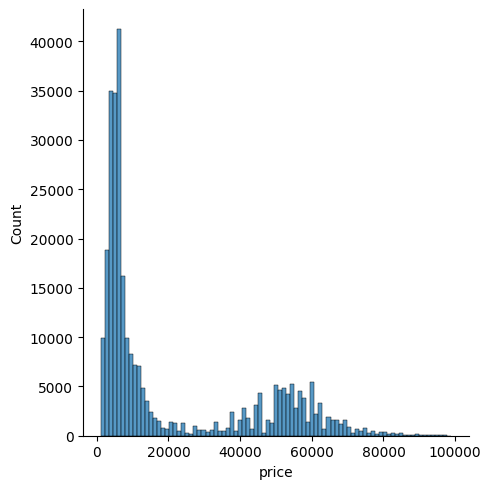

In [100]:
sns.displot(df[dependent_var])

In [101]:
X = df1[independent_var]
y = np.log(df1[dependent_var]+1)

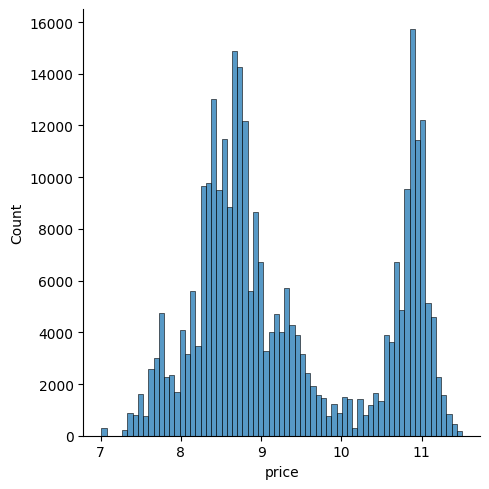

In [102]:
sns.displot(y)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [104]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(268318, 31) (268318,)
(29814, 31) (29814,)


# Feature Scaling

In [105]:
from sklearn.preprocessing import MinMaxScaler

#Transforming data

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Linear Regression Model (Baseline Model)

In [106]:
#Fitting Multiple Linear Regression to the Training set

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [107]:
#regressor coefficient

reg.coef_

array([-6.91176021e+11, -7.63929340e+10,  7.26581764e+09, -6.91176021e+11,
       -8.08610410e-03,  7.26581764e+09, -5.53186043e-02, -6.40776322e+10,
       -6.40776322e+10, -6.91176021e+11,  7.26581764e+09,  4.10835397e+09,
       -7.63929340e+10, -6.91176021e+11, -7.63929340e+10,  7.26581764e+09,
        8.61830649e-02, -4.19044495e-03,  7.26581764e+09, -3.33786011e-03,
       -6.91176021e+11, -6.91176021e+11,  7.26581764e+09, -7.63929340e+10,
        7.26581764e+09,  7.26581764e+09,  1.05247498e-01, -7.63929340e+10,
       -7.63929340e+10, -6.40776322e+10,  4.10835397e+09])

In [108]:
#intercept

reg.intercept_

820272415260.5675

In [109]:
#score on train set

reg.score(X_train,y_train)

0.88507685186997

In [110]:
#score on test set

reg.score(X_test,y_test)

0.8831099031552494

In [111]:
y_pred_lr = reg.predict(X_test) 

In [112]:
y_pred_lr

array([ 7.93896484, 10.87561035,  8.79992676, ...,  8.99645996,
        8.80981445,  7.94372559])

In [113]:
y_pred_lr_actual = convert_log_toactual(y_pred_lr)
y_pred_lr_actual

array([ 1031.70168956, 19450.15564956,  2440.42322914, ...,
        2970.4239358 ,  2464.67308047,  1036.62506548])

In [114]:
mse_lr,rmse_lr,r2_score_lr,aj_r2_score_lr=scores(y_test,y_pred_lr)

print("MSE :" , mse_lr)
print("RMSE :" ,rmse_lr)
print("R2 :" ,r2_score_lr)
print("Adjusted R2 : ",aj_r2_score_lr)

MSE : 0.1441791689584707
RMSE : 0.3797093216639153
R2 : 0.8831099031552494
Adjusted R2 :  0.8829882325823467


# Lasso Regression Model

No improvement over baseline model

In [115]:
lasso  = Lasso(alpha=0.001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [116]:
lasso.score(X_train, y_train)

0.8848691506314478

In [117]:
lasso.score(X_test, y_test)

0.8828770065946995

In [118]:
y_pred_lasso = lasso.predict(X_test)

In [119]:
#actual predicted value
y_pred_lasso_actual = convert_log_toactual(y_pred_lasso)
y_pred_lasso_actual

array([ 1059.93918378, 19537.37570535,  2483.26837077, ...,
        2977.74384312,  2495.87976815,  1067.04283149])

In [120]:
mse_lasso,rmse_lasso,r2_score_lasso,aj_r2_score_lasso=scores(y_test,y_pred_lasso)

print("MSE :" , mse_lasso)
print("RMSE :" ,rmse_lasso)
print("R2 :" ,r2_score_lasso)
print("Adjusted R2 :",aj_r2_score_lasso)

MSE : 0.14446643737093479
RMSE : 0.38008740754060083
R2 : 0.8828770065946995
Adjusted R2 : 0.8827550936004223


Tuning Lasso regression model

In [121]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso(max_iter=30000)
parameters = {'alpha': [0.001,0.01,0.1,1,10,100,1000,10000]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=30000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='neg_mean_squared_error')

In [122]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.14315793666655685


In [123]:
lasso_optimum_model = lasso_regressor.best_estimator_
lasso_optimum_model

Lasso(alpha=0.001, max_iter=30000)

In [124]:
lasso_optimum_model.score(X_train,y_train)

0.8848691506314478

In [125]:
lasso_optimum_model.score(X_test,y_test)

0.8828770065946995

In [126]:
y_pred_lasso_cv = lasso_optimum_model.predict(X_test)

In [127]:
y_pred_lasso_cv_actual = convert_log_toactual(y_pred_lasso_cv)
y_pred_lasso_cv_actual

array([ 1059.93918378, 19537.37570535,  2483.26837077, ...,
        2977.74384312,  2495.87976815,  1067.04283149])

In [128]:
mse_lasso_cv,rmse_lasso_cv,r2_score_lasso_cv,aj_r2_score_lasso_cv=scores(y_test,y_pred_lasso)

print("MSE :" , mse_lasso_cv)
print("RMSE :" ,rmse_lasso_cv)
print("R2 :" ,r2_score_lasso_cv)
print("Adjusted R2 :",aj_r2_score_lasso_cv)

MSE : 0.14446643737093479
RMSE : 0.38008740754060083
R2 : 0.8828770065946995
Adjusted R2 : 0.8827550936004223


# Random Forest Model

In [129]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [130]:
rf.score(X_train,y_train)

0.8583764839628617

In [131]:
rf.score(X_test,y_test)

0.8567014298863163

In [132]:
y_pred_rf = rf.predict(X_test)

In [133]:
mse_rf,rmse_rf,r2_score_rf,aj_r2_score_rf=scores(y_test,y_pred_rf)

print("MSE :" , mse_rf)
print("RMSE :" ,rmse_rf)
print("R2 :" ,r2_score_rf)
print("Adjusted R2 :",aj_r2_score_rf)

MSE : 0.17675294408703288
RMSE : 0.4204199615706096
R2 : 0.8567014298863163
Adjusted R2 : 0.8565522708078956


Random forest regression model hyper parameter tuning

In [134]:
#Cross validation using grid search cv

parameters_dict = {
    'n_estimators' : [200,300],
    'max_depth':[5,7],
    'min_samples_split' : [2,3]
    }
rf = RandomForestRegressor()
rf_cv = GridSearchCV(rf,param_grid = parameters_dict,cv = 5,verbose = 2)
rf_cv.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time= 1.7min
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time= 1.9min
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time= 1.9min
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time= 1.8min
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time= 2.0min
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time= 2.7min
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time= 2.7min
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time= 2.8min
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time= 3.1min
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time= 3.4min
[CV] END .max_depth=5, min_samples_split=3, n_estimators=200; total time= 2.3min
[CV] END .max_depth=5, min_samples_split=3, n_est

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 7], 'min_samples_split': [2, 3],
                         'n_estimators': [200, 300]},
             verbose=2)

In [135]:
rf_cv_optimal_model = rf_cv.best_estimator_
rf_cv_optimal_model

RandomForestRegressor(max_depth=7, min_samples_split=3, n_estimators=200)

In [136]:
 
rf_cv_optimal_model.score(X_train,y_train)

0.9008960303944535

In [137]:
#accuracy decreased by 0.5 % w.r.t to lasso cv 

rf_cv_optimal_model.score(X_test,y_test)

0.8988993232963223

In [138]:
y_pred_rf_cv = rf_cv_optimal_model.predict(X_test)

In [139]:
y_pred_rf_cv_actual = convert_log_toactual(y_pred_rf_cv)
y_pred_rf_cv_actual

array([ 1268.38954718, 23500.95424193,  2889.52057602, ...,
        2889.52057602,  2889.52057602,   885.09965742])

In [140]:
mse_rf_cv,rmse_rf_cv,r2_score_rf_cv,aj_r2_score_rf_cv=scores(y_test,y_pred_rf_cv)

print("MSE :" , mse_rf_cv)
print("RMSE :" ,rmse_rf_cv)
print("R2 :" ,r2_score_rf_cv)
print("Adjusted R2 :",aj_r2_score_rf_cv)

MSE : 0.12470356293429559
RMSE : 0.35313391643156505
R2 : 0.8988993232963223
Adjusted R2 : 0.8987940878864165


# XGBoost Model

In [141]:
import xgboost as xg

xgb= xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 200)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [142]:
xgb.score(X_train, y_train)

0.9370357582800621

In [143]:
xgb.score(X_test, y_test)

0.932509143933596

In [144]:
y_pred_xgb = xgb.predict(X_test)

In [145]:
#actual predicted value
y_pred_xgb_actual = convert_log_toactual(y_pred_xgb)

In [146]:
mse_xgb,rmse_xgb,r2_score_xgb,aj_r2_score_xgb=scores(y_test,y_pred_xgb)

print("MSE :" , mse_xgb)
print("RMSE :" ,rmse_xgb)
print("R2 :" ,r2_score_xgb)
print("Adjusted R2 :",aj_r2_score_xgb)

MSE : 0.08324721941905804
RMSE : 0.2885259423675071
R2 : 0.932509143933596
Adjusted R2 : 0.9324388928914209


XG boost regression model hyper parameter tuning

In [147]:
parameters_dict = {
    'n_estimators' : [300,400]
    }
xgb= xg.XGBRegressor(objective ='reg:squarederror')
xgb_cv = GridSearchCV(xgb,param_grid = parameters_dict,cv = 5,verbose = 2)
xgb_cv.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ...................................n_estimators=300; total time= 2.3min
[CV] END ...................................n_estimators=300; total time= 2.2min
[CV] END ...................................n_estimators=300; total time= 2.3min
[CV] END ...................................n_estimators=300; total time= 2.2min
[CV] END ...................................n_estimators=300; total time= 2.3min
[CV] END ...................................n_estimators=400; total time= 3.0min
[CV] END ...................................n_estimators=400; total time= 3.0min
[CV] END ...................................n_estimators=400; total time= 3.0min
[CV] END ...................................n_estimators=400; total time= 3.0min
[CV] END ...................................n_estimators=400; total time= 3.0min


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'n_estimators': [300, 400]}, verbose=2)

In [148]:
#best params for XG boost
xgb_cv_optimal = xgb_cv.best_estimator_
xgb_cv_optimal

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [149]:
#Score for train set

xgb_cv_optimal.score(X_train, y_train)

0.9423274470192269

In [150]:
#Score for test set

xgb_cv_optimal.score(X_test, y_test)

0.935580911845429

In [151]:
y_pred_xgb_cv = xgb_cv_optimal.predict(X_test)

In [152]:
y_pred_xgb_cv_actual = convert_log_toactual(y_pred_xgb_cv)

In [153]:
mse_xgb_cv,rmse_xgb_cv,r2_score_xgb_cv,aj_r2_score_xgb_cv=scores(y_test,y_pred_xgb_cv)

print("MSE :" , mse_xgb_cv)
print("RMSE :" ,rmse_xgb_cv)
print("R2 :" ,r2_score_xgb_cv)
print("Adjusted R2 :",aj_r2_score_xgb_cv)

MSE : 0.07945831893290634
RMSE : 0.2818835201513319
R2 : 0.935580911845429
Adjusted R2 : 0.9355138581978301


# SNN

In [154]:
input_dim = X_train.shape[1]
input_dim

31

In [155]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# Define the model
snn_model = keras.Sequential([
    layers.Dense(256, activation='relu',input_shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='linear')  # Output layer with a single neuron for regression
])

In [156]:
# Model compiling

snn_model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error'])
print(snn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               8192      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 51,969
Trainable params: 51,969
Non-traina

In [157]:
# Model Training

snn_model_history = snn_model.fit(X_train, y_train, batch_size=256, epochs=50, verbose=1, validation_split=0.1)

Epoch 1/50
944/944 [==============================] - 8s 7ms/step - loss: 1.9258 - mean_squared_error: 1.9258 - val_loss: 0.1345 - val_mean_squared_error: 0.1345
Epoch 2/50
944/944 [==============================] - 7s 7ms/step - loss: 0.1289 - mean_squared_error: 0.1289 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 3/50
944/944 [==============================] - 6s 6ms/step - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.1271 - val_mean_squared_error: 0.1271
Epoch 4/50
944/944 [==============================] - 6s 7ms/step - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.1111 - val_mean_squared_error: 0.1111
Epoch 5/50
944/944 [==============================] - 6s 7ms/step - loss: 0.1122 - mean_squared_error: 0.1122 - val_loss: 0.1088 - val_mean_squared_error: 0.1088
Epoch 6/50
944/944 [==============================] - 6s 6ms/step - loss: 0.1117 - mean_squared_error: 0.1117 - val_loss: 0.1124 - val_mean_squared_error: 0.1124
Epoch 7/50
944/944 [========

In [158]:
 #Predictions on the Test Set

score = snn_model.evaluate(X_test, y_test, verbose=1)

932/932 [==============================] - 1s 1ms/step - loss: 0.0977 - mean_squared_error: 0.0977


In [159]:
y_pred_snn = snn_model.predict(X_test)

932/932 [==============================] - 1s 1ms/step


In [160]:
y_pred_snn

array([[ 8.098173 ],
       [11.137064 ],
       [ 8.828919 ],
       ...,
       [ 9.379604 ],
       [ 9.041697 ],
       [ 7.7033086]], dtype=float32)

In [161]:
mse_snn,rmse_snn,r2_score_snn,aj_r2_score_snn=scores(y_test,y_pred_snn)

print("MSE :" , mse_snn)
print("RMSE :" ,rmse_snn)
print("R2 :" ,r2_score_snn)
print("Adjusted R2 :",aj_r2_score_snn)

MSE : 0.09769426881580605
RMSE : 0.3125608241859591
R2 : 0.9207965157134042
Adjusted R2 : 0.9207140730294714


# Creating data frame name of ML model, r2 score, adjusted r2 score

In [162]:
score_df = pd.DataFrame()
score_df['name_of_model'] = ['linear regression','lasso regression','lasso regression cv','random forest','random forest cv','xg boost','xg boost cv','Simple Neural Network']
score_df['r2_score'] = [r2_score_lr,r2_score_lasso,r2_score_lasso_cv,r2_score_rf,r2_score_rf_cv,r2_score_xgb,r2_score_xgb_cv,r2_score_snn]
score_df['adj_r2_score'] = [aj_r2_score_lr,aj_r2_score_lasso,aj_r2_score_lasso_cv,aj_r2_score_rf,aj_r2_score_rf_cv,aj_r2_score_xgb,aj_r2_score_xgb_cv,aj_r2_score_snn]

In [163]:
score_df= score_df.sort_values(by='r2_score',ascending=False)
score_df

,name_of_model,r2_score,adj_r2_score
6,xg boost cv,0.935581,0.935514
5,xg boost,0.932509,0.932439
7,Simple Neural Network,0.920797,0.920714
4,random forest cv,0.898899,0.898794
0,linear regression,0.883110,0.882988
1,lasso regression,0.882877,0.882755
2,lasso regression cv,0.882877,0.882755
3,random forest,0.856701,0.856552


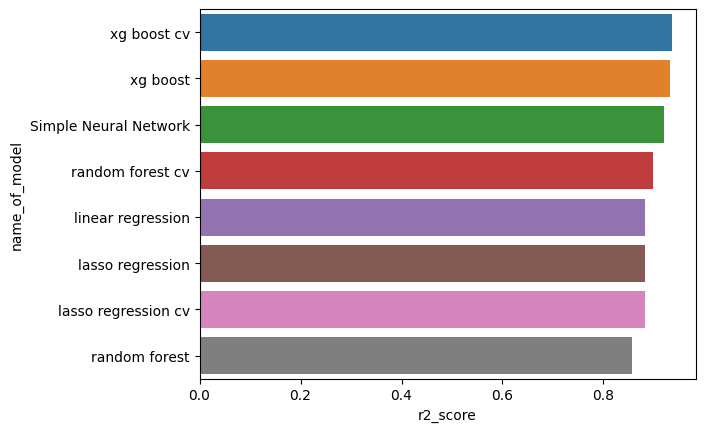

In [164]:
sns.barplot(data=score_df, x='r2_score', y='name_of_model')
plt.show()

# Conclusion

During EDA, It was found out that price of ticket for business class is nearly normally distributed where as price of ticket for economy class is positively skewed.Vistara and Air India are only flight service provider that provides both business and economy class sitting. Vistara and Air India are 1st and 2nd largest flight operator for both business and economy class. In economy class, Indigo is third largest flight operator. Mean and median price for ticket in business class is about approximately 58000 Rs and for economy class is around 6000 Rs.Mean price of ticket for economy class flight with non-stop is less than 5000 Rs. Most of the flight has atleast 1stop followed by non-stop.Most of the non-stop flight spend 2.1 to 2.5 hr on air. Most popular flight departure time are as follows 7am, 10:25 am, 7pm, 9:45 pm and 8:30 pm. Most popular origin point for flight are as follows Mumbai 20%, Delhi 20%, Bangalore 13%. Most popular Destination points are as follows Mumbai 20%, Delhi 19%, Bangalore 17%.

After Experimenting with various ML model. XGBoost Regressor model is making predictions for flight price with accuracy of around 93.5 % even better than Simple Neural Network model or Linear Regression Model.


Way Ahead:
- More non-stop flight must be added as it is seen that it cost much lower than flight which has more than or equal to 1 stop.

- 1 stop flight cost much higher so it is costly for people travelling from origin to destination location. Some of then can be converted to non-stop if after data augmentation if it is found that most of the people are travelling form origin to destination. It will save money for airline company as well as for passengers.

- Mumbai and Delhi are most popular destinantion so they must be managed and maintained very well so that customer can access services more easily and conviniently.

# ML Model Deployement 

Plan for model deployment:
This will take 2-3 days for release,test and deployment. This can be done in 3 ways:

1. Using PaaS like Azure ML/ AWS Lambda (most convinient and seemless method)
2. Using Git Version Control, VM (AWS EC2/ Azure) and Flask app ---> Budget friendly
2. Using Git version Control, VM (AWS EC2 / Azure) ,Fast Api and Docker ---> Budget friendly

Demo Flask app: https://github.com/chandrakar-shubham/End-to-End-ML-Model-Bike_Sharing_Demand_Pred.git

Creating ML Model and deployment using FlaskApi or FastApi

Estimate time to completion (ETA) : 2-3 days

Step 1: Create a python virualenv

Step 2: create template 

Step 3: Create train.py 

Step 4: Create model.py and export pickel file

Step 5: Create app.py for flask app

Step 6: Create VM in AWS EC2

Step 7: git clone git repo

Step 8: pip install -r requirements.txt , activate virtual env

Step 9: run app.py

Step 10: Create test.py for unit test and model testing

Now model will be deployed